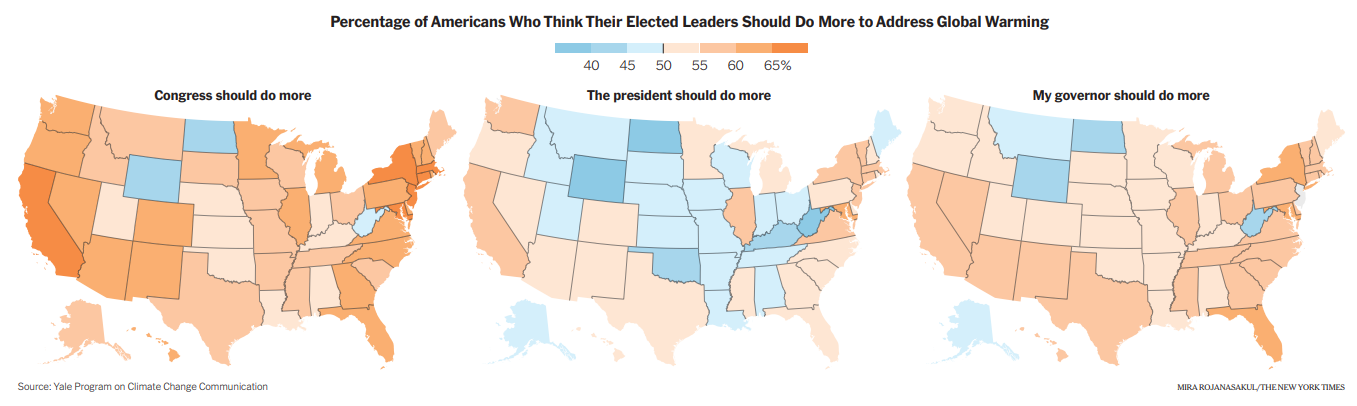

In [43]:
import pandas as pd
import plotly.express as px
from nltk.app.nemo_app import images
from plotly.subplots import make_subplots
from PIL import Image
image = "/Users/jorgejimenez/Documents/UP/DataScienceB/CLASE1Y2/WhatIsGoiingOnThisGraph/GlobalWarmingGraphLN-superJumbo.png"

Image.open(image)

In [44]:
states = [
    "AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA",
    "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD",
    "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ",
    "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC",
    "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"
]

# For reproducibility, set a random seed
np.random.seed(42)

# Generate synthetic data for each metric using random integers
data = {
    "state": states,
    "congress_more": np.random.randint(40, 71, len(states)).tolist(),
    "president_more": np.random.randint(40, 71, len(states)).tolist(),
    "governor_more": np.random.randint(40, 71, len(states)).tolist()
}

df = pd.DataFrame(data)
print(df)


   state  congress_more  president_more  governor_more
0     AL             46              58             51
1     AK             59              51             41
2     AZ             68              62             49
3     AR             54              59             69
4     CA             50              64             43
5     CO             47              42             53
6     CT             68              44             70
7     DE             60              58             55
8     FL             46              46             54
9     GA             65              60             47
10    HI             58              48             53
11    ID             62              46             62
12    IL             50              57             67
13    IN             50              43             64
14    IA             63              64             69
15    KS             60              67             47
16    KY             43              53             60
17    LA  

In [45]:
# Create the three choropleth maps
fig_congress = px.choropleth(
    df,
    locations="state",
    locationmode="USA-states",
    color="congress_more",
    color_continuous_scale="Oranges",
    scope="usa",
    range_color=(40, 70),
    title="Congress should do more"
)

fig_president = px.choropleth(
    df,
    locations="state",
    locationmode="USA-states",
    color="president_more",
    color_continuous_scale="Blues",
    scope="usa",
    range_color=(40, 70),
    title="The president should do more"
)

fig_governor = px.choropleth(
    df,
    locations="state",
    locationmode="USA-states",
    color="governor_more",
    color_continuous_scale="Oranges",
    scope="usa",
    range_color=(40, 70),
    title="My governor should do more"
)

In [46]:
# Create a 1-row, 3-column subplot layout
# Create a 1-row, 3-column subplot layout
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=[
        "Congress should do more",
        "The president should do more",
        "My governor should do more"
    ],
    specs=[[{"type": "choropleth"}, {"type": "choropleth"}, {"type": "choropleth"}]]
)


# Add each map’s trace to the subplot
to_add = [fig_congress, fig_president, fig_governor]
for i, subfig in enumerate(to_add, start=1):
    for trace in subfig.data:
        fig.add_trace(trace, row=1, col=i)
# Update the overall layout
fig.update_layout(
    height=500, width=1000,  # Adjust for your preference
    title_text="Percentage of Americans Who Think Their Elected Leaders Should Do More to Address Global Warming",
    geo=dict(scope="usa", projection=dict(type="albers usa")),
    geo2=dict(scope="usa", projection=dict(type="albers usa")),
    geo3=dict(scope="usa", projection=dict(type="albers usa"))
)

fig.show()
